
Data loaded successfully
   Execution_Id   Task_Id Developer     LLM  Story_Points  Prompt_Iterations  \
0             1  29682716      Dev1  GPT-4o             1                 22   
1             2  28955401      Dev2  GPT-4o             4                 22   
2             3  33580804      Dev3  GPT-4o            24                 76   
3             4  91102633      Dev4  GPT-4o             8                 30   
4             5  89191553      Dev5  GPT-4o             1                 20   

   Corrective_Prompts  Context_Prompts  Modified_Files  Validation_Detected  \
0                   5                5               3                   15   
1                   5                5               3                   17   
2                  17               20               8                   39   
3                   5                6               4                   22   
4                   5                5               3                   15   

   Manual_Correcti

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RQ3 Mixed-Effects Model Summary:
             Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  Actual_Time_Min
No. Observations:  330      Method:              REML           
No. Groups:        22       Scale:               1275.4925      
Min. group size:   15       Log-Likelihood:      -1632.9315     
Max. group size:   15       Converged:           No             
Mean group size:   15.0                                         
----------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------------
Intercept            88.524    2.326 38.063 0.000  83.966 93.083
Prompt_Iterations    16.821    9.139  1.841 0.066  -1.091 34.734
Corrective_Prompts  -16.087    4.554 -3.532 0.000 -25.013 -7.161
Context_Prompts      -5.490    3.898 -1.408 0.159 -13.130  2.150
Modified_Files        4.076    2.927  1.393 0.164  -1.660  9.812
Valid

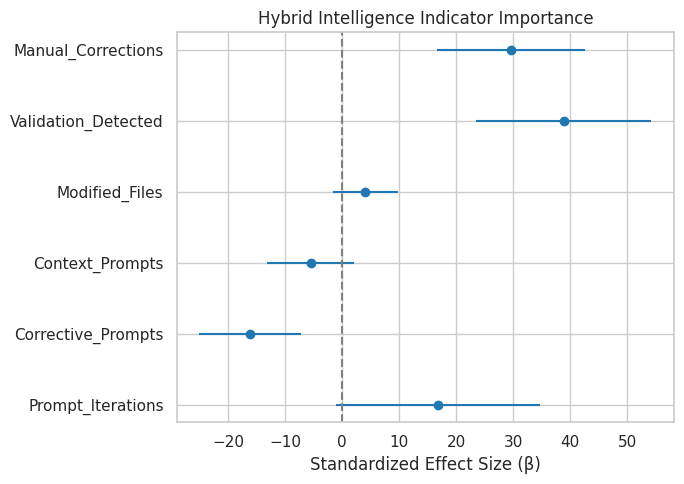


Exploratory – LLM Effect

Effort Statistics by LLM:
                  mean  median          var
LLM                                        
DeepSeek-R1  97.290909    70.5  7932.244871
GPT-4o       78.900000    60.0  5011.063303
Gemini~2.5   89.381818    73.5  6385.394162

ANOVA – Effort Differences Across LLMs:
             df        sum_sq      mean_sq         F    PR(>F)
C(LLM)      2.0  1.872375e+04  9361.875758  1.453053  0.235361
Residual  327.0  2.106829e+06  6442.900778       NaN       NaN


/tmp/ipython-input-4268587237.py:97: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("LLM")["Actual_Time_Min"]
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)



LLM Mixed-Effects Model Summary:
             Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: Actual_Time_Min
No. Observations:   330     Method:             REML           
No. Groups:         22      Scale:              6442.9008      
Min. group size:    15      Log-Likelihood:     -1905.0587     
Max. group size:    15      Converged:          Yes            
Mean group size:    15.0                                       
---------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------------
Intercept          97.291    7.653 12.712 0.000  82.291 112.291
LLM[T.GPT-4o]     -18.391   10.823 -1.699 0.089 -39.604   2.822
LLM[T.Gemini~2.5]  -7.909   10.823 -0.731 0.465 -29.122  13.304
Group Var           0.000    3.812                             



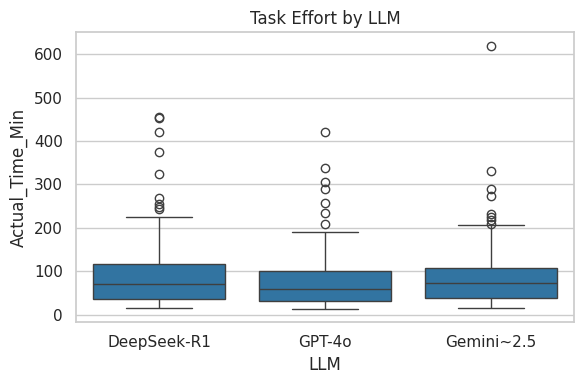


Analysis complete.


In [1]:
# ============================================================
# Empirical Analysis of LLM-Assisted Software Effort
# Research Questions: RQ1 – RQ3
# ============================================================

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")

# ------------------------------------------------------------
# 1. LOAD DATA
# ------------------------------------------------------------

CSV_PATH = "Task_execution_observations.csv"
df = pd.read_csv(CSV_PATH)

# Ensure correct data types
df["Developer"] = df["Developer"].astype("category")
df["Task_Id"] = df["Task_Id"].astype("category")
df["LLM"] = df["LLM"].astype("category")

print("\nData loaded successfully")
print(df.head())
print("\nTotal records:", len(df))

hie_vars = [
    "Prompt_Iterations",
    "Corrective_Prompts",
    "Context_Prompts",
    "Modified_Files",
    "Validation_Detected",
    "Manual_Corrections"
]

# ============================================================
# RQ3 – DOMINANT HYBRID INTELLIGENCE DRIVERS
# ============================================================

print("\n==============================")
print("RQ3 – Hybrid Intelligence Drivers")
print("==============================")

# --- Standardize predictors
scaler = StandardScaler()
df_std = df.copy()
df_std[hie_vars] = scaler.fit_transform(df[hie_vars])

# --- Mixed-effects model
rq3_mixed = smf.mixedlm(
    "Actual_Time_Min ~ " + " + ".join(hie_vars),
    df_std,
    groups=df_std["Developer"]
).fit()

print("\nRQ3 Mixed-Effects Model Summary:")
print(rq3_mixed.summary())

# --- Extract coefficients and CIs
coef = rq3_mixed.params[hie_vars]
ci = rq3_mixed.conf_int().loc[hie_vars]

# --- Figure RQ3.1: Coefficient Importance
plt.figure(figsize=(7, 5))
plt.errorbar(
    coef,
    hie_vars,
    xerr=[coef - ci[0], ci[1] - coef],
    fmt="o",
     color="tab:blue",
)
plt.axvline(0, linestyle="--", color="gray")
plt.xlabel("Standardized Effect Size (β)")
plt.title("Hybrid Intelligence Indicator Importance")
plt.tight_layout()
plt.show()

# ============================================================
# EXPLORATORY ANALYSIS – LLM EFFECT
# ============================================================

print("\n==============================")
print("Exploratory – LLM Effect")
print("==============================")

# --- Effort variance across LLMs
print("\nEffort Statistics by LLM:")
print(
    df.groupby("LLM")["Actual_Time_Min"]
    .agg(["mean", "median", "var"])
)

# --- ANOVA across LLMs
anova_llm = smf.ols(
    "Actual_Time_Min ~ C(LLM)",
    data=df
).fit()

print("\nANOVA – Effort Differences Across LLMs:")
print(anova_lm(anova_llm))

# --- Mixed-effects model with LLM
llm_model = smf.mixedlm(
    "Actual_Time_Min ~ LLM",
    df,
    groups=df["Developer"]
).fit()

print("\nLLM Mixed-Effects Model Summary:")
print(llm_model.summary())

# --- Figure E.1: Effort by LLM
plt.figure(figsize=(6, 4))
sns.boxplot(
    x="LLM",
    y="Actual_Time_Min",
    data=df,
     color="tab:blue",
)
plt.title("Task Effort by LLM")
plt.tight_layout()
plt.show()

# ============================================================
# END OF SCRIPT
# ============================================================

print("\nAnalysis complete.")